In [2]:
import numpy as np
import matplotlib.pyplot as plt
import freud
import gsd
import hoomd
import gsd.pygsd
import gsd.hoomd

## --------------------------------------------------------
## Plotting RDFs using the Freud package
## --------------------------------------------------------

In [3]:
# Function from rdf tutorial
def rdf_from_gsd(gsd_file, r_max=None, r_min=0.1, nbins=50, start=0):
    f = gsd.pygsd.GSDFile(open(gsd_file, "rb"))
    trajectory = gsd.hoomd.HOOMDTrajectory(f)
    
    if r_max is None:
        r_max = max(trajectory[-1].configuration.box[:3]) * 0.45
    freud_rdf = freud.density.RDF(bins=nbins, r_max=r_max, r_min=r_min)
    for frame in trajectory[start:]:
        freud_rdf.compute(system=frame, reset=False)
    return freud_rdf

In [4]:
file_path = 'data/ptb7/trajectories/5mer-1.4kT-1.0den-centers.gsd'
file_path2 = 'data/ptb7/trajectories/5mer-1.4kT-1.0den-trajectory.gsd'

In [16]:
centers_rdf = rdf_from_gsd(gsd_file = file_path, r_min=0, start=95)
all_particle_rdf = rdf_from_gsd(gsd_file = file_path2, r_min=0, start=95)

In [17]:
centers_rdf

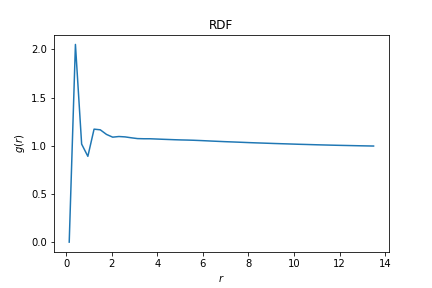

In [18]:
all_particle_rdf

The function we've used so far `rdf_from_gsd` returns an RDF object (in this case I called it `myrdf`) and when we run this object in a cell it shows us a plot of the RDF.  However, there is more information contained in this RDF object that just the graph.    

Python has a built-in method called `dir` that we can use with our RDF objects to see what other kind of information is available.

You can access these lower level bits of the rdf object using a period after the object.

For example:

To access the bin centers of the RDF histogram (the x-values on the plots above) you would use `myrdf.bin_centers`

You can save this information in a new variable:

`myrdf_x = myrdf.bin_centers`

In [19]:
# Using the dir() method to see what other functions/attributes are available for an object
dir(centers_rdf)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_called_compute',
 '_computed_property',
 '_preprocess_arguments',
 '_repr_png_',
 '_reset',
 '_resolve_neighbors',
 'bin_centers',
 'bin_counts',
 'bin_edges',
 'bounds',
 'box',
 'compute',
 'default_query_args',
 'n_r',
 'nbins',
 'plot',
 'rdf']

In [20]:
centers_rdf_y = centers_rdf.rdf # yvalues
centers_rdf_x = centers_rdf.bin_centers #xvalues

In [21]:
plt.plot(centers_rdf_x, centers_rdf_y)

## ------------------------------------------------------------
## Plotting multiple data sets on a single plot
## ------------------------------------------------------------

So far we have created 2 RDFs.  One using the full-particle trajectory and one using only "center" particles.  It could be useful to compare them, and plotting them together makes the comparison a little easier.

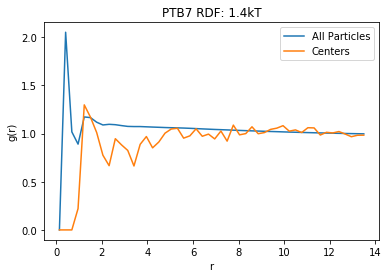

In [29]:
# Lets define all of our x and y data sets

all_particles_x = all_particle_rdf.bin_centers
all_particles_y = all_particle_rdf.rdf
centers_particles_x = centers_rdf.bin_centers
centers_particles_y = centers_rdf.rdf

fig = plt.figure() # Creates a matplotlib figure

# Plot each dataset one at a time
# matplotlib plotting function has a label parameter we might want to use in this case
plt.plot(all_particles_x, all_particles_y, label='All Particles') 
plt.plot(centers_particles_x, centers_particles_y, label='Centers')

plt.xlabel('r')  # Creates x axis label
plt.ylabel('g(r)') # Creates y axis label
plt.title('PTB7 RDF: 1.4kT') # Creates a plot title
plt.legend() # Creates a legend that uses the labels from plt.plot

Things start to look the same around r = 6-7, so we can tell matplotlib to set a limit on the x-axis values and give us a closer look at the plot in the area we're more interested in.

In [32]:
fig = plt.figure() # Creates a matplotlib figure
plt.plot(all_particles_x, all_particles_y, label='All Particles') 
plt.plot(centers_particles_x, centers_particles_y, label='Centers')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('PTB7 RDF: 1.4kT')
plt.xlim(0, 6) # Set the xaxis limits
plt.legend()

## -------------------------------------------------------
## Setting up a workflow for data analysis
## -------------------------------------------------------

In [68]:
myname = 'Emily'
print('Hello, my name is {}'.format(myname))

Hello, my name is Emily


In [62]:
# Lets define which workspace we want to be in right now
# PTB7 is our only option for now anyway, but eventually we'll add ITIC

data_path = 'data/ptb7/trajectories/'

In [63]:
def rdf_from_gsd(temp, all_particles=False, r_max=None, r_min=0.1, nbins=50, start=95):
    
    if all_particles:
        rdf_type = 'trajectory'
    else:
        rdf_type = 'centers'
    gsd_file = '{}5mer-{}kT-1.0den-{}.gsd'.format(data_path, temp, rdf_type)
    print(gsd_file)
    
    f = gsd.pygsd.GSDFile(open(gsd_file, "rb"))
    trajectory = gsd.hoomd.HOOMDTrajectory(f)    
    if r_max is None:
        r_max = max(trajectory[-1].configuration.box[:3]) * 0.45
    freud_rdf = freud.density.RDF(bins=nbins, r_max=r_max, r_min=r_min)
    for frame in trajectory[start:]:
        freud_rdf.compute(system=frame, reset=False)
    return freud_rdf

In [56]:
rdf_cold = rdf_from_gsd(temp=1.4)
rdf_mid = rdf_from_gsd(temp=1.7)
rdf_hot = rdf_from_gsd(temp=2.4)

data/ptb7/trajectories/5mer-1.4kT-1.0den-centers.gsd
data/ptb7/trajectories/5mer-1.7kT-1.0den-centers.gsd
data/ptb7/trajectories/5mer-2.4kT-1.0den-centers.gsd


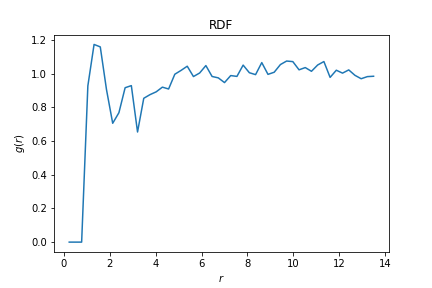

In [51]:
rdf_cold

In [48]:
rdf_mid

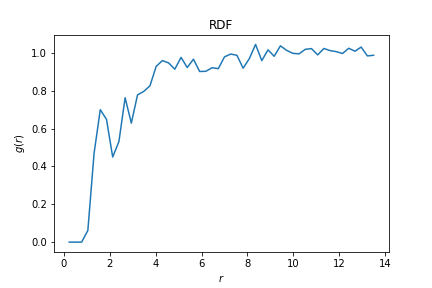

In [49]:
rdf_hot

In [57]:
rdf_cold_centers = rdf_from_gsd(temp=1.4)
rdf_cold_all_particles = rdf_from_gsd(temp=1.4, all_particles=True)

data/ptb7/trajectories/5mer-1.4kT-1.0den-centers.gsd
data/ptb7/trajectories/5mer-1.4kT-1.0den-trajectory.gsd


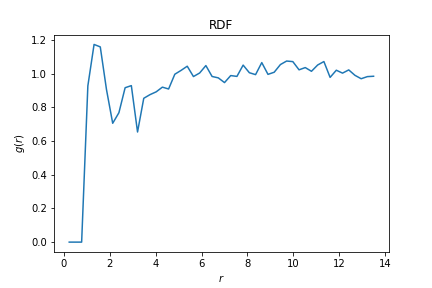

In [58]:
rdf_cold_centers

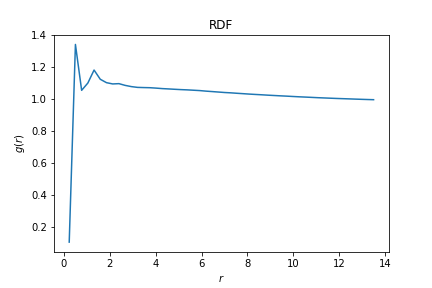

In [59]:
rdf_cold_all_particles